## Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings as w
w.filterwarnings('ignore')
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)


### Load the data

## Data Description

#### The data set contains the following columns:

> * **Avg. Area Income**: Avg. Income of residents of the city house is located in.

> * **Avg. Area House Age**: Avg Age of Houses in same city

> * **Avg. Area Number of Rooms**: Avg Number of Rooms for Houses in same city

> * **Avg. Area Number of Bedrooms**: Avg Number of Bedrooms

> * **Area Population**: Population of city house is located in

> * **Price**: Price that the house sold at

> * **Address**: Address for the house


In [2]:
df = pd.read_csv(
    r"C:\Users\harsh\College\ML-Assignments\Data Sets\MLK\USA_Housing.csv")
df.head()


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.46,5.68,7.01,4.09,23086.80,1059033.56,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64,6.00,6.73,3.09,40173.07,1505890.91,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.07,5.87,8.51,5.13,36882.16,1058987.99,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24,7.19,5.59,3.26,34310.24,1260616.81,USS Barnett\nFPO AP 44820
4,59982.20,5.04,7.84,4.23,26354.11,630943.49,USNS Raymond\nFPO AE 09386


In [3]:
df.describe()


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00
mean,68583.11,5.98,6.99,3.98,36163.52,1232072.65
std,10657.99,0.99,1.01,1.23,9925.65,353117.63
min,17796.63,2.64,3.24,2.00,172.61,15938.66
25%,61480.56,5.32,6.30,3.14,29403.93,997577.14
50%,68804.29,5.97,7.00,4.05,36199.41,1232669.38
75%,75783.34,6.65,7.67,4.49,42861.29,1471210.20
max,107701.75,9.52,10.76,6.50,69621.71,2469065.59


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


> #### There is no null value in the dataset.

# EDA

In [5]:
# Dropping the columns which are not required

df.drop(["Address"], axis=1, inplace=True)


### Cheking Outliers using Boxplot and Removing them

In [6]:
df.shape

(5000, 6)

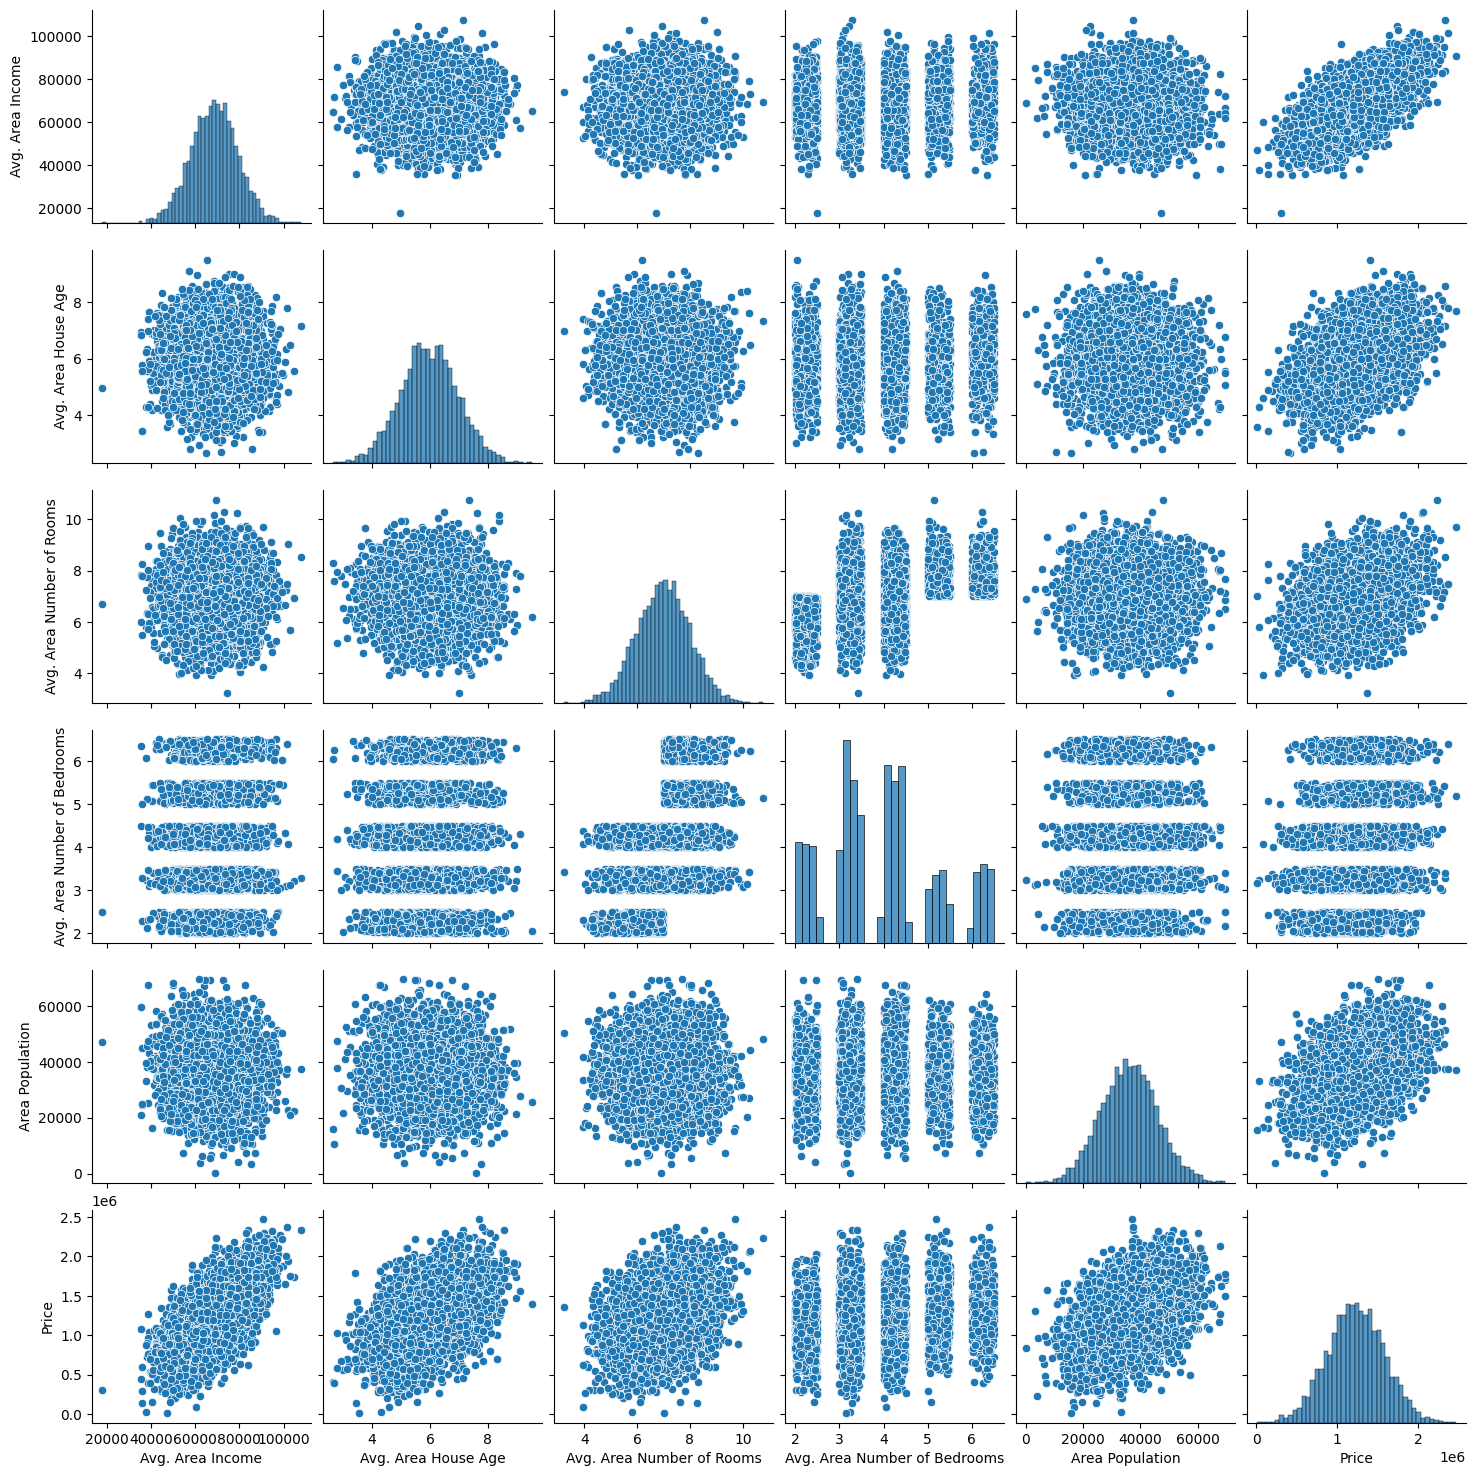

In [7]:
sns.pairplot(df)


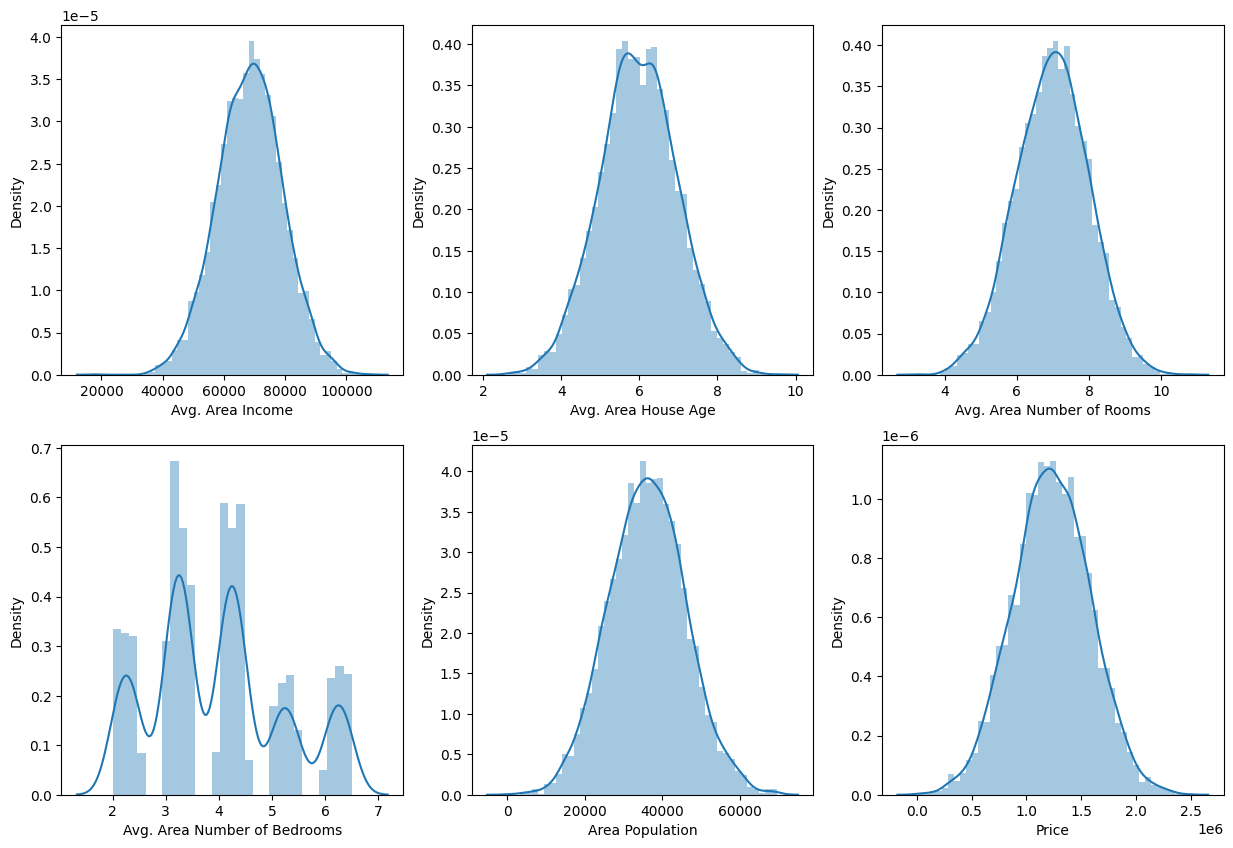

In [22]:
import seaborn as sns

fix , ax  = plt.subplots(2, 3, figsize=(15, 10))

for axes, feature in zip(ax.flatten(), df.columns):
    sns.distplot(a=df[feature], ax=axes)

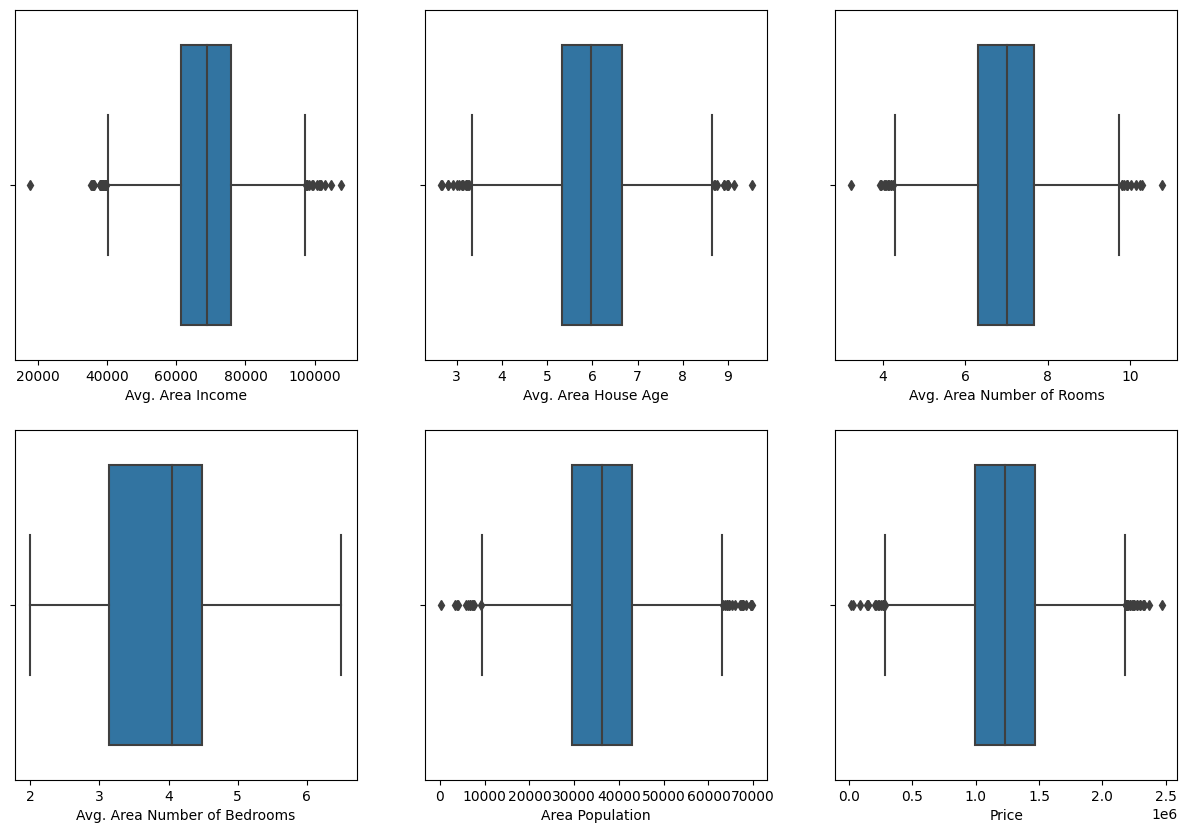

In [25]:
import seaborn as sns

fix , ax  = plt.subplots(2, 3, figsize=(15, 10))

for axes, feature in zip(ax.flatten(), df.columns):
    sns.boxplot(data=df, x = feature , ax=axes)

In [26]:
# Removing the outliers using iqr

q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1
print(iqr)
print(df.shape)
df = df[~((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))).any(axis=1)]
print(df.shape)

Avg. Area Income                14302.78
Avg. Area House Age                 1.33
Avg. Area Number of Rooms           1.37
Avg. Area Number of Bedrooms        1.35
Area Population                 13457.36
Price                          473633.07
dtype: float64
(5000, 6)
(4865, 6)


In [27]:
# Converting Avg. Area Number of Rooms and Avg. Area Number of Bedrooms into int

df["Avg. Area Number of Rooms"] = df["Avg. Area Number of Rooms"].astype(int)
df["Avg. Area Number of Bedrooms"] = df["Avg. Area Number of Bedrooms"].astype(
    int)


<Axes: xlabel='Avg. Area Number of Bedrooms', ylabel='Price'>

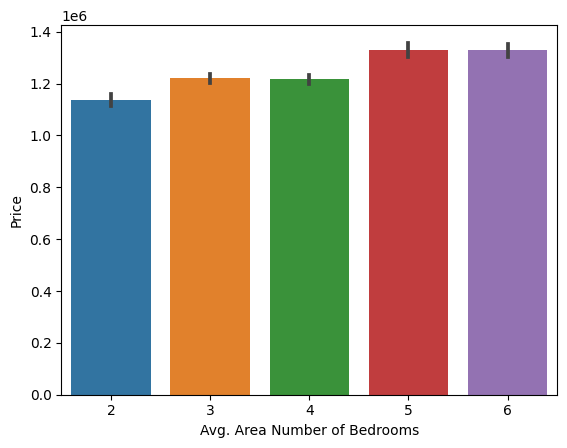

In [28]:
sns.barplot(x="Avg. Area Number of Bedrooms", y="Price", data=df)

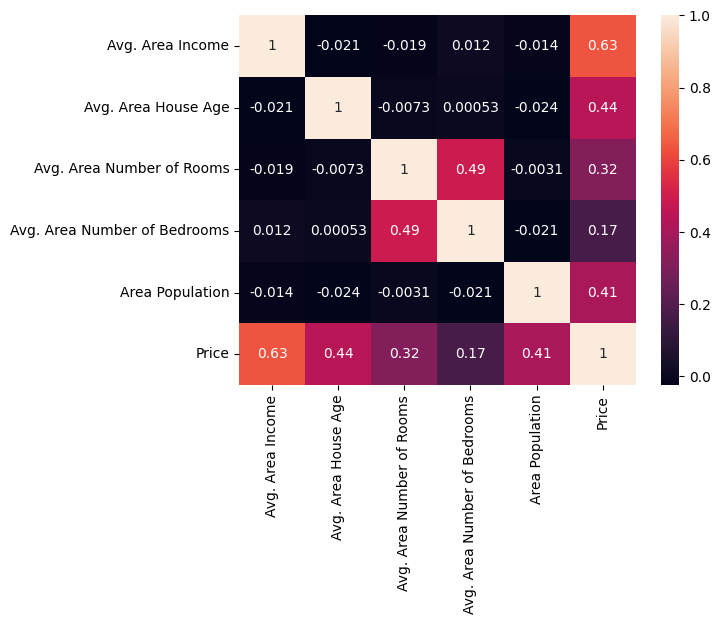

In [30]:
sns.heatmap(df.corr(), annot=True);

# Linear Regression Model Creation

In [31]:
# Importing the linear regression model

from sklearn.linear_model import LinearRegression

# Importing the preprocessing libraries

from sklearn.preprocessing import StandardScaler

# Importing the train_test_split library

from sklearn.model_selection import train_test_split

# Importing the metrics libraries

from sklearn.metrics import (
    accuracy_score,
    mean_absolute_error,
    mean_squared_error,
    r2_score,
)


In [32]:
# Getting columns having unique values greater than 10 in a list

coltoscale = [i for i in df.columns if len(df[i].unique()) > 10 and i != "Price"]

In [34]:
# Splitting the data into X and y
X = df.drop("Price", axis=1)
y = df["Price"]

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101
)

# Scaling the data
sc = StandardScaler()
X_train[coltoscale] = sc.fit_transform(X_train[coltoscale])
X_test[coltoscale] = sc.transform(X_test[coltoscale])

# First Model

Model for Avg. Area Income
Mean Absolute Error: 211716.7618223326
Mean Squared Error: 69468862512.40393
Root Mean Squared Error: 263569.4643019254
R2 Score: 0.4054556296229629



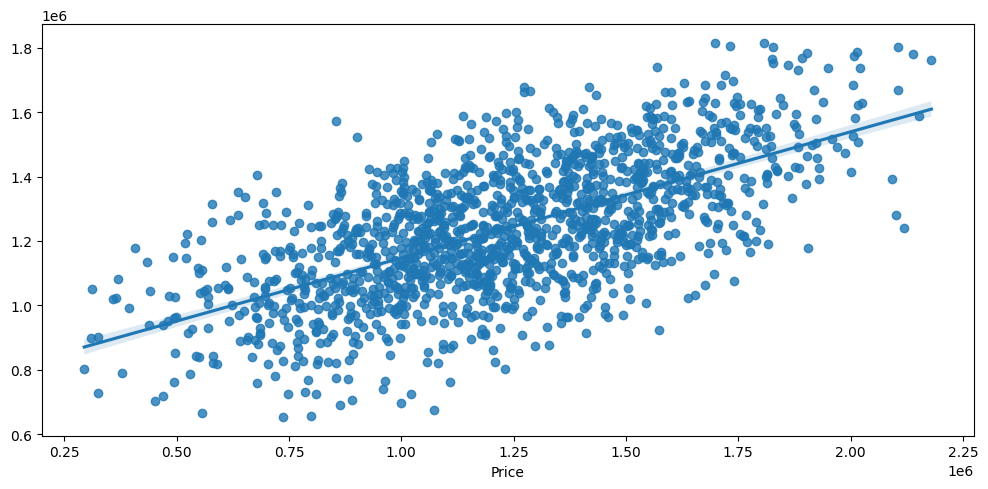

-----------------*********---------------------------------*********---------------------------------*********---------------------------------*********----------------
Model for Avg. Area House Age
Mean Absolute Error: 250258.96637564513
Mean Squared Error: 94851512716.43703
Root Mean Squared Error: 307979.72776862606
R2 Score: 0.188220004361892



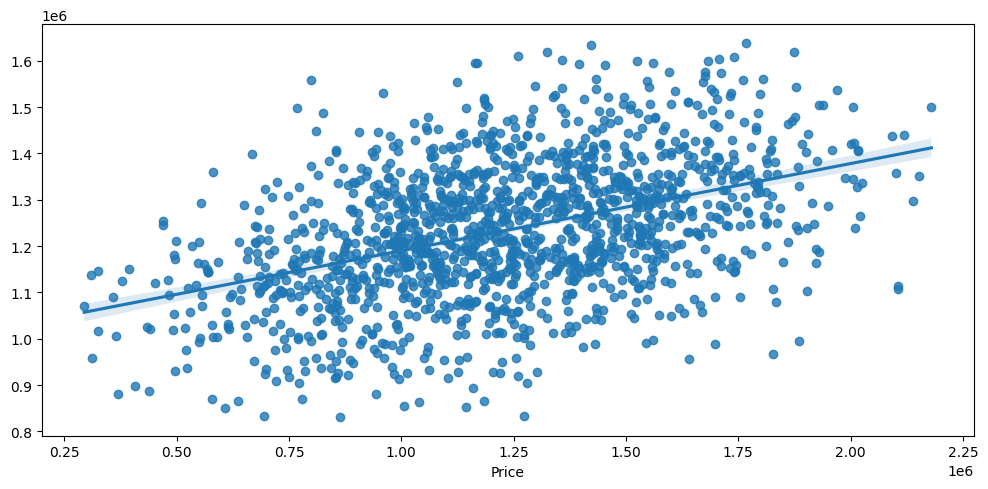

-----------------*********---------------------------------*********---------------------------------*********---------------------------------*********----------------
Model for Area Population
Mean Absolute Error: 250099.563647741
Mean Squared Error: 97081911020.01926
Root Mean Squared Error: 311579.7025160966
R2 Score: 0.16913129746307765



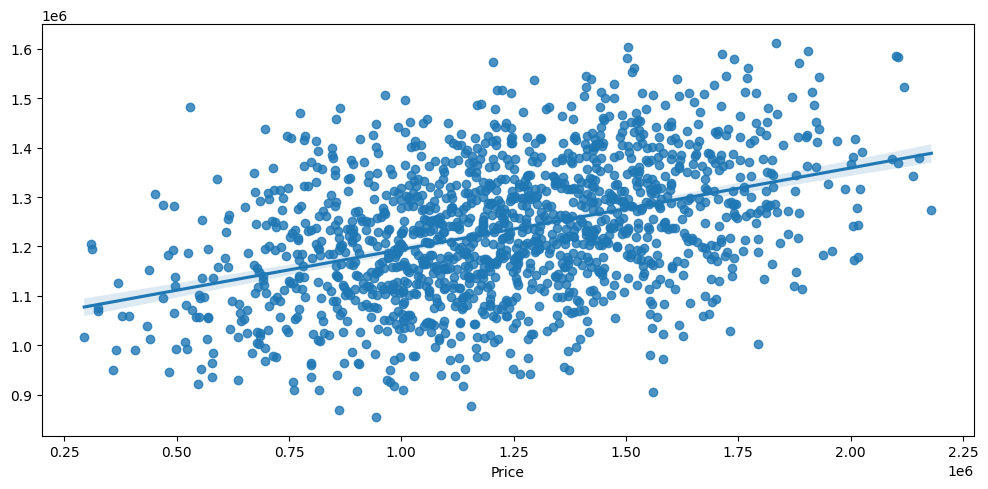

-----------------*********---------------------------------*********---------------------------------*********---------------------------------*********----------------


In [44]:
# Creating the model for every feature

for i in coltoscale:
    model = LinearRegression()
    model.fit(X_train[[i]], y_train)
    y_pred = model.predict(X_test[[i]])
    print("Model for", i)
    print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    print("Root Mean Squared Error:", np.sqrt(
        mean_squared_error(y_test, y_pred)))
    print("R2 Score:", r2_score(y_test, y_pred))
    print("")
    plt.figure(figsize=(10, 5))
    sns.regplot(x=y_test, y=y_pred)
    plt.tight_layout()
    plt.show()
    print("-----------------*********----------------"*4)


> ### We can see that Avg. Area Income is the best feature for our model.

# Creating the 2nd model for 3 best features

Model for 3 best features
Mean Absolute Error: 126038.18739819269
Mean Squared Error: 24921076256.015427
Root Mean Squared Error: 157864.10692749452
R2 Score: 0.7867147228860233



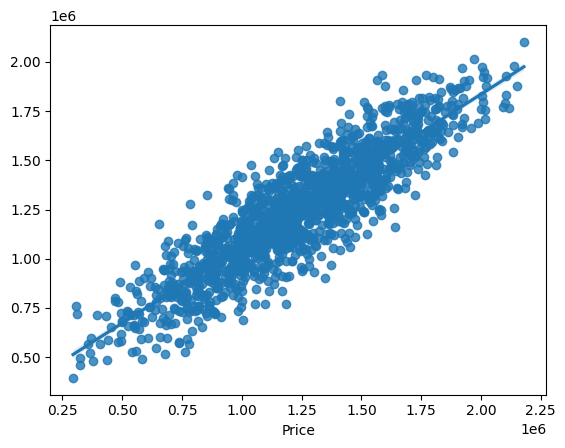

In [45]:
# Creating the model for with 3 best features (Avg. Area Income, Avg. Area House Age, Avg. Area Number of Rooms)

model = LinearRegression()
model.fit(
    X_train[["Avg. Area Income", "Avg. Area House Age", "Area Population"]],
    y_train,
)
y_pred = model.predict(
    X_test[["Avg. Area Income", "Avg. Area House Age", "Area Population"]]
)

print("Model for 3 best features")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))
print("")
sns.regplot(x=y_test, y=y_pred)
plt.show()


# Making 3rd model with 3 worst features

Model for 3 worst features
Mean Absolute Error: 230898.06691241986
Mean Squared Error: 83752534231.4612
Root Mean Squared Error: 289400.30102171836
R2 Score: 0.2832098305448094



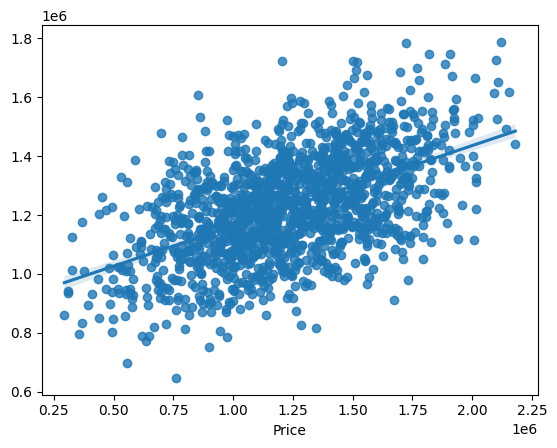

In [46]:
# Creating the model for with 3 worst features (Avg. Area Number of Bedrooms, Area Population, Avg. Area Number of Bedrooms)

model = LinearRegression()
model.fit(
    X_train[
        [
            "Avg. Area Number of Bedrooms",
            "Area Population",
            "Avg. Area Number of Rooms",
        ]
    ],
    y_train,
)
y_pred = model.predict(
    X_test[
        [
            "Avg. Area Number of Bedrooms",
            "Area Population",
            "Avg. Area Number of Rooms",
        ]
    ]
)

print("Model for 3 worst features")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))
print("")
sns.regplot(x=y_test, y=y_pred)
plt.show()


# Making Model with all features

In [48]:
# Creating the model for with all features using KFoldCrossValidation

from sklearn.model_selection import KFold, cross_val_score

model = LinearRegression()

kfold = KFold(n_splits=10, random_state=101, shuffle=True)

scores = cross_val_score(model, X, y, cv=kfold, scoring="r2")

print("Model for all features")

print("Mean Absolute Error:", scores.mean())
print("Mean Squared Error:", scores.std())
print("Root Mean Squared Error:", scores.std())
print("R2 Score:", scores.mean())


Model for all features
Mean Absolute Error: 0.9011357578323942
Mean Squared Error: 0.0063270491377929484
Root Mean Squared Error: 0.0063270491377929484
R2 Score: 0.9011357578323942


Model for all features
Mean Absolute Error: 85321.46336924603
Mean Squared Error: 11379969733.389126
Root Mean Squared Error: 106676.94096377683
R2 Score: 0.9026053299945785



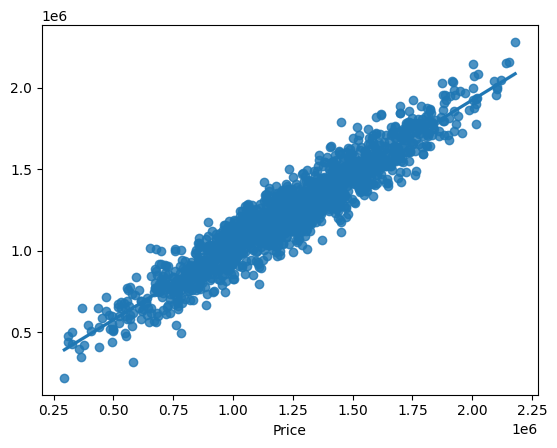

In [49]:
# Creating the model for with all features

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Model for all features")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))
print("")
sns.regplot(x=y_test, y=y_pred)
plt.show()


 ## We can see that the model with all features is the best model
- ### We can see that the model with all features is the best model and scaling had no effect on the model. 

df.to_csv(r'C:\Users\harsh\College\ML-Assignments\Data Sets\MLK\cleanusa.csv',index=False)